In [286]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import sympy as sy
import scipy as sp
from scipy.optimize import newton


In [287]:
def f(x):
    return 1/(1+25*x**2)
def fp(f,n):
    x = sy.symbols("x")
    y=sy.diff(f(x),x,n)
    fpp=sy.lambdify(x,y,'numpy')
    return fpp

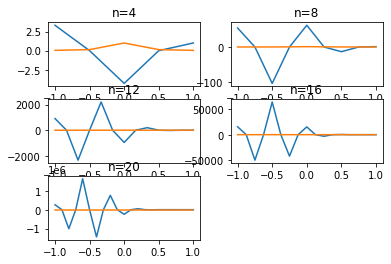

In [312]:
n=[4,8,12,16,20]
n2=[4,8,12,16]
j=1
for i in n:
    i=i+1
    x=np.linspace(-1,1,i)
    y=f(x)
    yl=sp.interpolate.lagrange(x,y)
    plt.subplot(3,2,j)
    plt.plot(x,yl)
    plt.plot(x,y)
    plt.title(f'n={i-1}')
    j+=1
#plt.legend(["1","2"])

In [ ]:
#Punto 2

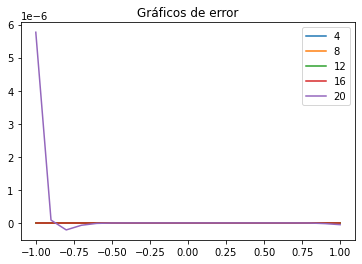

In [306]:
from math import *
lista=[]
r=0
j=1
for i in n:
    i+=1
    a=np.linspace(-1,1,i)
    P=np.poly1d(a,r=True)
    fac=factorial(i)
    fpp=fp(f,i)
    x=sy.symbols("x")
    df=sy.diff(fpp(x),x,1)
    pc1=sy.solve(sy.Eq(df,0))
    m=max(pc)
    fm=fpp(m)
    r+=1
    eps=(fpp(m)/fac)*P
    plt.plot(a,eps(a))
    lista.append(eps(0.5))
    #plt.subplot(3,2,j)
    #plt.plot(a,eps(a))
    #plt.title(f'Error para n={i}')
    #j+=1
    
plt.legend(["4","8","12","16","20"]);
plt.title("Gráficos de error");

In [307]:
print(f'Para n=4 en el punto 0.5 el error es de: {lista[0]}')

Para n=4 en el punto 0.5 el error es de: 0.0


In [ ]:
#Punto 3

Text(0.5, 1.0, 'Gráficos de error')

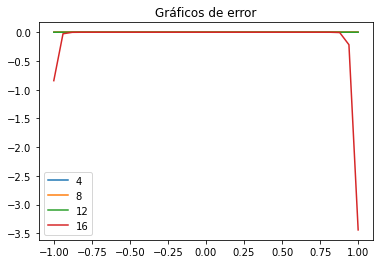

In [315]:
from math import *
r=0
lista2=[]
j=1
for i in n2:
    i=(2*i)+2
    a=np.linspace(-1,1,i)
    P=np.poly1d(a,r=True)**2
    fac=factorial(i)
    fpp=fp(f,i)
    x=sy.symbols("x")
    df=sy.diff(fpp(x),x,1)
    pc1=sy.solve(sy.Eq(df,0))
    m=max(pc)
    fm=fpp(m)
    r+=1
    eps=(fpp(m)/fac)*P
    plt.plot(a,eps(a))
    lista2.append(eps(0.5))
    #plt.subplot(3,2,j)
    #plt.plot(a,eps(a))
    #plt.title(f'Error para n={i}')
    #j+=1
    
plt.legend(["4","8","12","16","20"]);
plt.title("Gráficos de error")
    
    

In [316]:
print(f'Para n=4 en el punto 0.5 el error es de: {lista2[0]}')

Para n=4 en el punto 0.5 el error es de: -0.000633011938813473


In [317]:
#SplineCubic

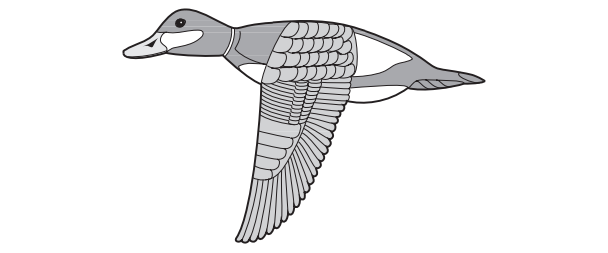

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from IPython.display import Image
Image("paloma.png")

In [321]:
dicc1={'x':[0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3],
       'f(x)':[1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]}
       #"f'(x)":[1,'-','-','-','-','-','-','-',-0.67]
df1=pd.DataFrame(dicc1)

In [322]:
from scipy import interpolate
P1=interpolate.CubicSpline(df1['x'],df1['f(x)'])


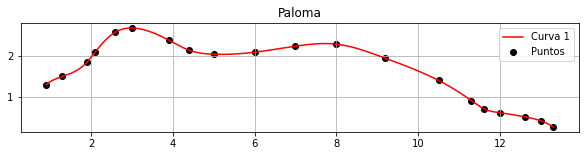

In [323]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,2))
x1=np.linspace(0.9,13.3,10000)
plt.plot(x1,P1(x1),c='r')
plt.scatter(df1['x'],df1['f(x)'],c='k')
plt.legend(['Curva 1',"Puntos"])
plt.title('Paloma')
plt.grid()